# Подготовка файлов и программ

Некоторые программы ставятся дважды из разных источников для демонстрации различных вариантов в случае неполадок. Для оптимизации времени работы необходимо удалить лишний код.

In [ ]:
pip install -q condacolab

In [ ]:
import condacolab

In [ ]:
condacolab.install()

In [ ]:
!conda install -c bioconda seqtk

In [ ]:
!conda install -c bioconda trimmomatic

In [ ]:
!pip install macs2 intervene

In [ ]:
!apt-get install bedtools

In [ ]:
!apt-get install bowtie2 samtools

In [ ]:
!conda install -c bioconda bowtie2

## Установка FastQC

In [ ]:
!wget https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip

In [ ]:
!unzip fastqc_v0.11.9.zip

In [ ]:
!chmod a+x FastQC/fastqc

In [ ]:
pip install multiqc

# Выравнивание

## Скачиваем чтения

Для примера чтения были взяты из эксперимента https://www.encodeproject.org/experiments/ENCSR000AKC/

In [ ]:
# ChIP-seq на гистоновой метке
!wget https://www.encodeproject.org/files/ENCFF002AAS/@@download/ENCFF002AAS.fastq.gz
!wget https://www.encodeproject.org/files/ENCFF002AAR/@@download/ENCFF002AAR.fastq.gz
# ChIP-seq контроль
!wget https://www.encodeproject.org/files/ENCFF000VQO/@@download/ENCFF000VQO.fastq.gz

In [ ]:
# распаковка ахрива
!gzip -d /content/ENCFF002AAS.fastq.gz /content/ENCFF002AAR.fastq.gz /content/ENCFF000VQO.fastq.gz

## FastQC (или multiQC может быть использован в работе)

In [ ]:
!./FastQC/fastqc /content/ENCFF002AAS.fastq
!./FastQC/fastqc /content/ENCFF002AAR.fastq
!./FastQC/fastqc /content/ENCFF000VQO.fastq
! multiqc .

Started analysis of ENCFF002AAS.fastq
Approx 5% complete for ENCFF002AAS.fastq
Approx 10% complete for ENCFF002AAS.fastq
Approx 15% complete for ENCFF002AAS.fastq
Approx 20% complete for ENCFF002AAS.fastq
Approx 25% complete for ENCFF002AAS.fastq
Approx 30% complete for ENCFF002AAS.fastq
Approx 35% complete for ENCFF002AAS.fastq
Approx 40% complete for ENCFF002AAS.fastq
Approx 45% complete for ENCFF002AAS.fastq
Approx 50% complete for ENCFF002AAS.fastq
Approx 55% complete for ENCFF002AAS.fastq
Approx 60% complete for ENCFF002AAS.fastq
Approx 65% complete for ENCFF002AAS.fastq
Approx 70% complete for ENCFF002AAS.fastq
Approx 75% complete for ENCFF002AAS.fastq
Approx 80% complete for ENCFF002AAS.fastq
Approx 85% complete for ENCFF002AAS.fastq
Approx 90% complete for ENCFF002AAS.fastq
Approx 95% complete for ENCFF002AAS.fastq
Analysis complete for ENCFF002AAS.fastq
Started analysis of ENCFF002AAR.fastq
Approx 5% complete for ENCFF002AAR.fastq
Approx 10% complete for ENCFF002AAR.fastq
Appr

## Выравнивание на хромосому

Следует выбрать одну хромосому, потому что ресурсы google colab ограничены. В случае проблем, таких как Segmentation fault, error 139, следует выбрать хромосому меньшего размера.

Последовательность нуклеотидов хромосомы можно скачать по адресу https://hgdownload.soe.ucsc.edu/goldenPath/hg38/chromosomes/

In [ ]:
!wget https://hgdownload.soe.ucsc.edu/goldenPath/hg38/chromosomes/chr19.fa.gz
!gzip -d chr19.fa.gz

In [ ]:
%%time
!bowtie2-build chr19.fa chromosome_index

Settings:
  Output files: "chromosome_index.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  chr19.fa
Building a SMALL index
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 14610189
Using parameters --bmax 10957642 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 10957642 --dcv 1024
Constructing suffix-arr

In [ ]:
!mkdir bowtie2_res

In [ ]:
%%time
!bowtie2  -p 2 \
          -x chromosome_index \
          -U ENCFF002AAS.fastq \
          -S bowtie2_res/res_AAS.sam

37767437 reads; of these:
  37767437 (100.00%) were unpaired; of these:
    31586804 (83.64%) aligned 0 times
    2245315 (5.95%) aligned exactly 1 time
    3935318 (10.42%) aligned >1 times
16.36% overall alignment rate
CPU times: user 6.53 s, sys: 813 ms, total: 7.34 s
Wall time: 15min 30s


In [ ]:
%%time
!bowtie2  -p 2 \
          -x chromosome_index \
          -U ENCFF002AAR.fastq \
          -S bowtie2_res/res_AAR.sam

37940801 reads; of these:
  37940801 (100.00%) were unpaired; of these:
    31908079 (84.10%) aligned 0 times
    1309322 (3.45%) aligned exactly 1 time
    4723400 (12.45%) aligned >1 times
15.90% overall alignment rate
CPU times: user 6.6 s, sys: 790 ms, total: 7.39 s
Wall time: 15min 49s


In [ ]:
%%time
!bowtie2  -p 2 \
          -x chromosome_index \
          -U ENCFF000VQO.fastq \
          -S bowtie2_res/res_VQO.sam

27422703 reads; of these:
  27422703 (100.00%) were unpaired; of these:
    18577410 (67.74%) aligned 0 times
    1347068 (4.91%) aligned exactly 1 time
    7498225 (27.34%) aligned >1 times
32.26% overall alignment rate
CPU times: user 7.92 s, sys: 983 ms, total: 8.9 s
Wall time: 19min 25s


Проанализируйте выдачу bowtie. Почему процент выравниваний получился именно таким?

Имеет смысл для дальнейшего анализа отобрать уникально картированные риды.

На этом моменте можно скачать себе на компьютер все полученные .bam или .sam файлы на случай сбоя.

## Peak calling

Помимо macs2 может быть использован пакет Homer для поиска пиков, а также macs3.

In [ ]:
!mkdir macs2

In [ ]:
!macs2 callpeak --broad -t bowtie2_res/res_AAS.sam \
    -c bowtie2_res/res_VQO.sam \
 	  -f SAM \
	  --outdir macs2_AAS

In [ ]:
!macs2 callpeak --broad -t bowtie2_res/res_AAR.sam \
    -c bowtie2_res/res_VQO.sam \
 	  -f SAM \
	  --outdir macs2_AAR

In [ ]:
!wget https://www.encodeproject.org/files/ENCFF590XUH/@@download/ENCFF590XUH.bed.gz
!gzip -d ENCFF590XUH.bed.gz

## Сравнение результатов

Сравниваем те пики, которые мы получили, с пиками, которые приведены в ENCODE (важно, чтобы версии генома hg38 или hg19) для .bed файла из ENCODE и той хромосомы, которую скачивали выше, сопадали.

Проанализируйте полученные результаты и приведите свои рассуждения в README.md. Как можно объяснить различия в количестве пересечений?

In [ ]:
!intervene venn -i macs2_AAS/NA_peaks.broadPeak ENCFF590XUH.bed --filenames --output venn_results/venn11.jpg

In [ ]:
!intervene venn -i ENCFF590XUH.bed macs2_AAS/NA_peaks.broadPeak --filenames --output venn_results/venn12.jpg

In [ ]:
!intervene venn -i macs2_AAR/NA_peaks.broadPeak ENCFF590XUH.bed --filenames --output venn_results/venn21.jpg

In [ ]:
!intervene venn -i ENCFF590XUH.bed macs2_AAR/NA_peaks.broadPeak --filenames --output venn_results/venn22.jpg

# Бонусная часть

Задание: получить ngsplot и heatmap (загрузить на гитхаб), проанализировать его, сравнив с теоретической версией локализации гистоновой метки. Как можно объяснить вид распределения и локализацию мод?

Ниже приведён пример для подсчёта ngsplot с использованием опубликованного .bigWig файла, а также приведено возможное получение .bigWig файла.

Проверяйте все файлы на совпадение версии сборки генома, которую вы используете!

## Установка deeptools и bedtools

In [ ]:
#!pip install imgaug==0.2.5

In [ ]:
!pip install -q deeptools

In [ ]:
!conda install -c bioconda bedtools

## Подсчёт ngsplot при помощи deeptools
Необходимо скачать аннотацию (например, для hg19 взять отсюда https://hgdownload-test.gi.ucsc.edu/goldenPath/hg19/bigZips/genes/ - hg19.knownGene)
Для hg38 - https://hgdownload-test.gi.ucsc.edu/goldenPath/hg38/bigZips/genes/

In [ ]:
!wget https://hgdownload-test.gi.ucsc.edu/goldenPath/hg38/bigZips/genes/hg38.knownGene.gtf.gz

In [ ]:
!wget https://www.encodeproject.org/files/ENCFF193RAI/@@download/ENCFF193RAI.bigWig

In [ ]:
# подсчёт матрицы. В примере считается 30 минут.
%%time
!computeMatrix scale-regions \
 -S ENCFF193RAI.bigWig \
 -R hg38.knownGene.gtf.gz \
 -out matrix.tab.gz \
 -a 2000 -b 2000 \
 --regionBodyLength 4000 \
 --skipZeros \
 --missingDataAsZero

In [29]:
!plotHeatmap \
 -m matrix.tab.gz \
 -out result.png \
 --colorMap YlGnBu \
 --regionsLabel 'genes' \
 --heatmapHeight 15 \
 --plotTitle 'ngs_plot' &

tcmalloc: large alloc 1426538496 bytes == 0x555b5e46c000 @  0x7fce5cd111e7 0x7fce5b0a70ce 0x7fce5b0fdcf5 0x7fce5b1a686d 0x7fce5b1a717f 0x7fce5b1a72d0 0x555af2fe6d5f 0x7fce5b0e8944 0x555af30743eb 0x555af3075ad8 0x555af309c4ac 0x555af2fe3af2 0x555af3012030 0x555af30759c8 0x555af30a074a 0x555af2fe4ead 0x7fce5b0e8944 0x555af30743eb 0x555af3075ad8 0x555af309c4ac 0x555af2fe3af2 0x555af3012030 0x555af30759c8 0x555af30a074a 0x555af3011e94 0x555af30759c8 0x555af309c544 0x555af2fe3af2 0x555af3012030 0x555af30759c8 0x555af309c4ac
tcmalloc: large alloc 1426538496 bytes == 0x555bc8900000 @  0x7fce5cd111e7 0x7fce5b0a70ce 0x7fce5b101726 0x7fce5b0f4475 0x7fce5b1a46ec 0x555af3074300 0x555af3075ad8 0x555af309d1d9 0x555af3011e94 0x555af30759c8 0x555af309c4ac 0x555af2fe3af2 0x555af2fe53a8 0x7fce5b0e8944 0x555af30743eb 0x555af3075ad8 0x555af309c4ac 0x555af2fe3af2 0x555af3012030 0x555af30759c8 0x555af309d1d9 0x555af2fe3af2 0x555af3012030 0x555af30759c8 0x555af309d1d9 0x555af2fe3af2 0x555af3012030 0x555af307

Получаем результат в файле "result.png"

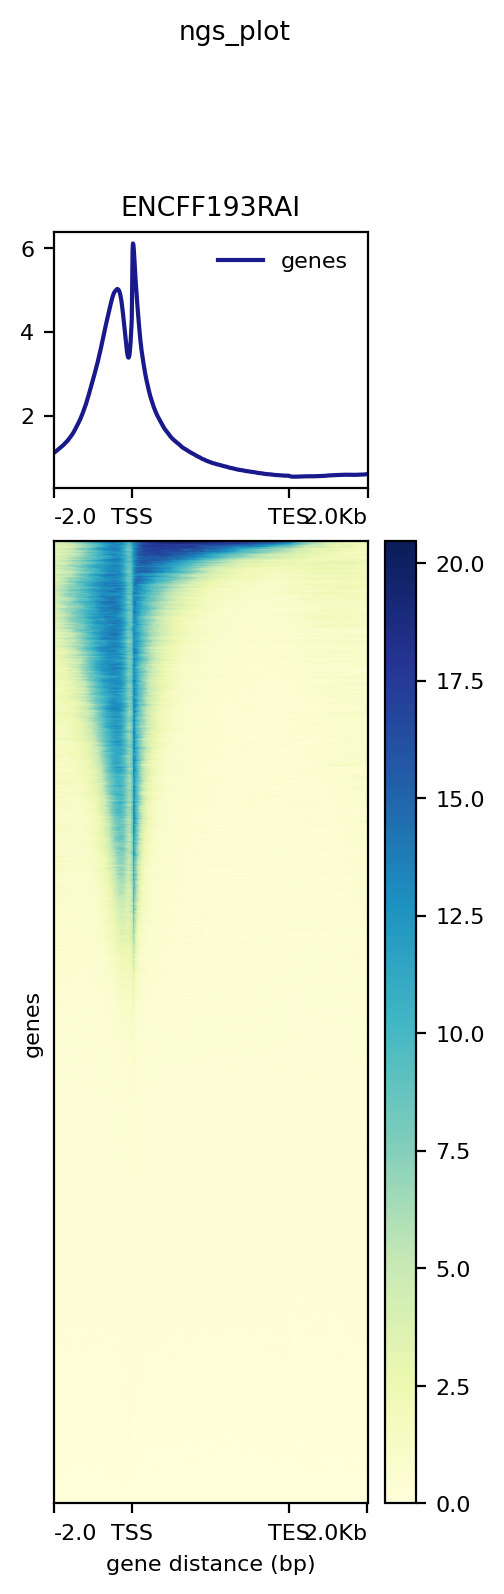